## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)

/home/dwalke/git/sbc/feature_variation/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs
$$$$$$$$$$$$$$$$$$$$
Testing: 


/home/dwalke/git/sbc/feature_variation/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/feature_variation/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 180157 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs


## Read file with all feature variations

In [3]:
X_train = data_analysis.get_X_train()
from dataAnalysis.FeatureImportance import FeatureImportance
feature_importance_large = FeatureImportance(X_train, is_normalize=False, steps = 20)
feature_importance_small = FeatureImportance(X_train, is_normalize=False, steps = 14)

## Read sepsis ratios for each model

In [4]:
import pandas as pd
from dataAnalysis.Constants import FEATURES
import matplotlib.pyplot as plt

xg_boost = pd.read_csv("csv_data/XGBoost.csv")
decision_tree = pd.read_csv("csv_data/Decision tree.csv")
logistig_regression = pd.read_csv("csv_data/Logistic regression.csv")
random_forest = pd.read_csv("csv_data/Random forest.csv")
rus_boost = pd.read_csv("csv_data/RUSBoost.csv")
het_gnn = pd.read_csv("csv_data/Heterogeneous GNN.csv")
hom_gnn = pd.read_csv("csv_data/Homogeneous GNN.csv")
neural_network = pd.read_csv("csv_data/Neural Network.csv")

In [5]:
def remove_first_column(df):
    # Was index while df creation
    return df.iloc[: , 1:]

xg_boost = remove_first_column(xg_boost)
decision_tree = remove_first_column(decision_tree)
logistig_regression = remove_first_column(logistig_regression)
random_forest = remove_first_column(random_forest)
rus_boost = remove_first_column(rus_boost)
het_gnn = remove_first_column(het_gnn)
hom_gnn = remove_first_column(hom_gnn)
neural_network = remove_first_column(neural_network)

In [6]:
def get_feature_importance(df):
    feature_name, feature_importance = df.columns[1:][i].split(" ")
    
    return f"; Feature importance: {feature_importance[1:-1]}"

In [23]:
n = np.empty(20)
het_gnn.iloc[:, i+1].values, n
df = pd.DataFrame([])
df["idx"] = np.arange(20)
df = pd.concat([df,pd.DataFrame(het_gnn.iloc[:, i+1].values)], ignore_index=True, axis=1)
df

,0,1
0,0,18.703795
1,1,20.326166
2,2,22.450002
3,3,23.134427
4,4,25.731001
5,5,27.420030
6,6,27.590624
7,7,28.692844
8,8,29.965007
9,9,33.149692


## Plot feature-wise importance

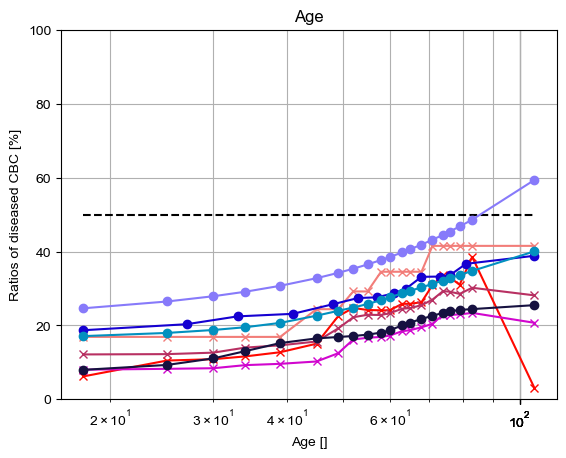

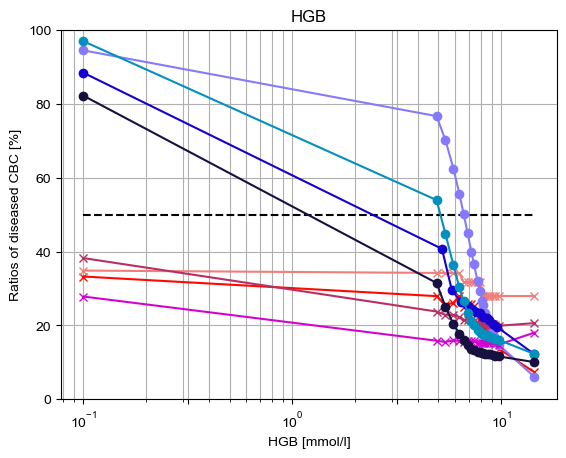

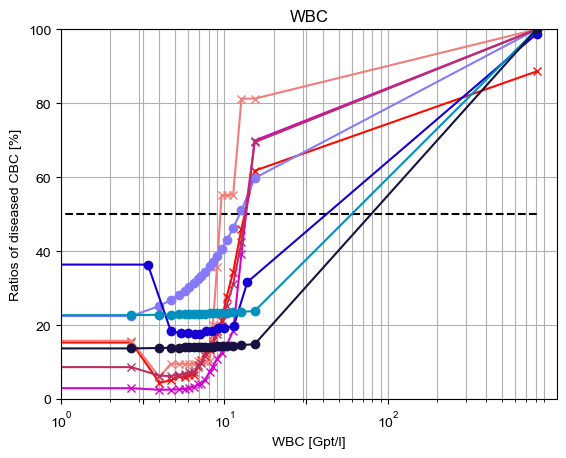

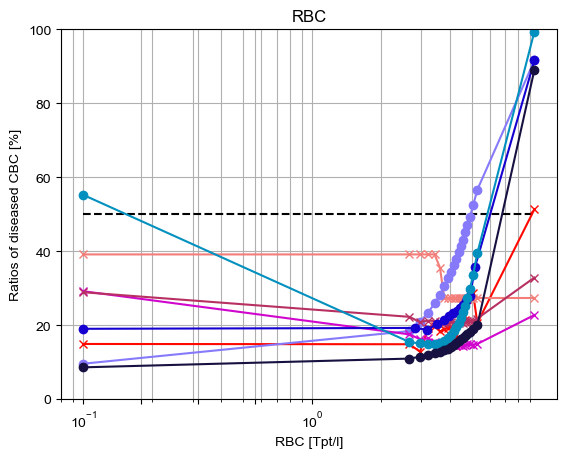

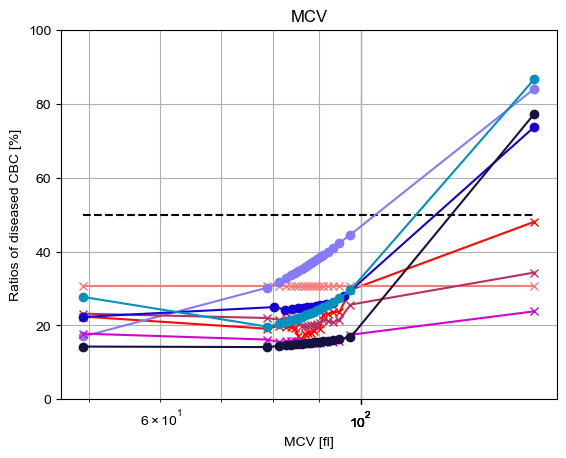

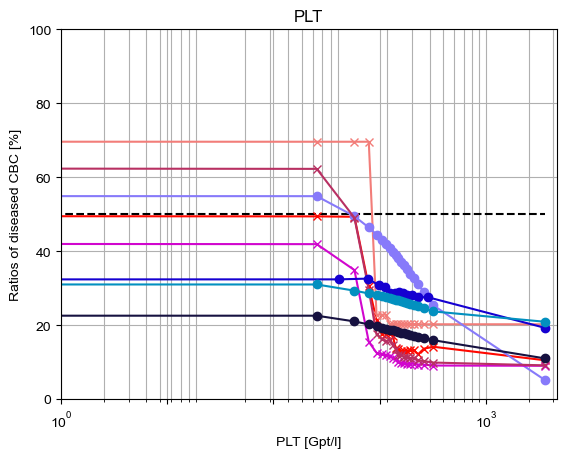

In [29]:
import numpy as np
from dataAnalysis.Constants import STEPS
from dataAnalysis.Constants import SEX_CATEGORY_COLUMN_NAME
import matplotlib

import matplotlib.font_manager
features = decision_tree.columns[1:]

feature_units = {
    "HGB": "mmol/l",
    "MCV": "fl",
    "PLT": "Gpt/l",
    "RBC": "Tpt/l",
    "WBC": "Gpt/l",
    "Age": ""
}



for i, feature in enumerate(features):
    
    
    if SEX_CATEGORY_COLUMN_NAME in feature:
        continue
    X_large = np.unique(feature_importance_large.X_all_fv[:, i]) if SEX_CATEGORY_COLUMN_NAME not in feature else np.linspace(0, 100, 20)
    X_small = np.unique(feature_importance_small.X_all_fv[:, i]) if SEX_CATEGORY_COLUMN_NAME not in feature else np.linspace(0, 100, 14)
    
    df = pd.DataFrame([])
    df["Baseline"] = np.ones(xg_boost.iloc[:,0].values.shape[0])*50
    df["large_index"] = X_large
    df = pd.concat([df,pd.DataFrame(X_small)], ignore_index=True, axis=1)
    df["XGBoost"] = xg_boost.iloc[:, i+1].values
    df["Decision Tree"] = decision_tree.iloc[:, i+1].values
    df["Logistic regression"] = logistig_regression.iloc[:, i+1].values
    df["Random Forest"] = random_forest.iloc[:, i+1].values
    df["RUSBoost"] = rus_boost.iloc[:, i+1].values
    df["Neural Network"] = neural_network.iloc[:, i+1].values
    df["HomGNN"] = hom_gnn.iloc[:, i+1].values
    df = pd.concat([df,pd.DataFrame(het_gnn.iloc[:, i+1])], ignore_index=True, axis=1)
    columns = {i: c for i, c in enumerate(["Baseline", "large_index", "small_index", "XGBoost", "Decision Tree","Logistic regression", "Random Forest",
                                  "RUSBoost", "Neural Network", "HomGNN", "HetGNN"])}
    df = df.rename(columns= columns)
    base = 10
    plt.semilogx(X_large, np.ones(xg_boost.iloc[:,0].values.shape[0])*50, "k--", label="No statement possible")
    plt.semilogx(X_large, xg_boost.iloc[:, i+1].values, color="#ff0800", marker="x", base=base, label=f"XGBoost{get_feature_importance(xg_boost)}")
    plt.semilogx(X_large, decision_tree.iloc[:, i+1].values,color="#f27d79", marker="x", base=base, label=f"Decision tree{get_feature_importance(decision_tree)}")
    plt.semilogx(X_large, logistig_regression.iloc[:, i+1].values,color='#877afa', marker="o", base=base, label=f"Logistic regression {get_feature_importance(logistig_regression)}")
    plt.semilogx(X_large, random_forest.iloc[:, i+1].values, color='#d106ce', marker="x", base=base, label=f"Random forest{get_feature_importance(random_forest)}")
    plt.semilogx(X_large, rus_boost.iloc[:, i+1].values, color='#b83062', marker="x", base=base, label=f"RUSBoost{get_feature_importance(rus_boost)}")
    plt.semilogx(X_small, het_gnn.iloc[:, i+1].values, color="#1500d1", marker="o", base=base, label=f"Heterogeneous GNN{get_feature_importance(het_gnn)}")
    plt.semilogx(X_large, hom_gnn.iloc[:, i+1].values, color="#0290bf", marker="o", base=base, label=f"Homogeneous GNN{get_feature_importance(hom_gnn)}")
    plt.semilogx(X_large, neural_network.iloc[:, i+1].values, color="#161140", marker="o", base=base, label=f"Neural Network{get_feature_importance(neural_network)}")
    
    feature_name, feature_importance = decision_tree.columns[1:][i].split(" ")
    
    models = ["No statement possible",
        f"XGBoost{get_feature_importance(xg_boost)}",
             f"Decision tree{get_feature_importance(decision_tree)}",
             f"Logistic regression {get_feature_importance(logistig_regression)}",
             f"Random forest{get_feature_importance(random_forest)}",
              f"RUSBoost{get_feature_importance(rus_boost)}",
             f"Heterogeneous GNN{get_feature_importance(het_gnn)}",
              f"Homogeneous GNN{get_feature_importance(hom_gnn)}",
             f"Neural Network{get_feature_importance(neural_network)}",] ## Featuree importance
#     plt.xlabel("Feature ratio [%]")
    feature_name = xg_boost.columns[1:][i].split(" ")[0]
    plt.xlabel(f"{feature_name} [{feature_units[feature_name]}]")
    plt.ylabel("Ratios of diseased CBC [%]")
    plt.ylim(0, 100)
    plt.rcParams.update({
    "font.family": "Arial",
})
#     plt.xlim(0, 100)
#     plt.xlim(
#         np.ceil(np.min(X_large)).astype(np.int16), np.floor(np.max(X_large)).astype(np.int16)
#     )
    # Set the desired tick locations and labels
    
    tick_positions = np.logspace(np.ceil(0 if np.min(X_large) == 0 else np.log10(np.min(X_large))).astype(np.int16),
                                 np.floor(np.log10(np.max(X_large))).astype(np.int16)
                                 , 5)  # Example: 11 ticks evenly spaced in log-scale
    tick_labels = [str(int(tick)) for tick in tick_positions]  # Convert the positions to string labels
    plt.xticks(tick_positions)
    
    plt.title(feature_name)
    plt.grid(True, which="both", ls="-")
#     plt.legend(models)
#     plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center')
    plt.show()
    df.to_csv(f"{feature_name}.csv")

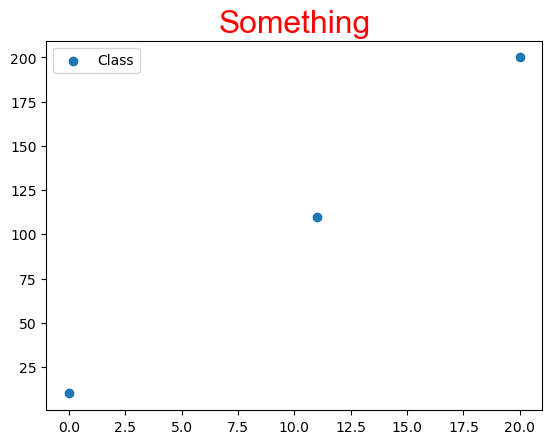

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
a = np.array([0,11,20])
b =np.array([10,110,200])
plt.scatter(a,b, label="Class")

font1 = {"family": "Arial", "size": 23, "color": "red"}
plt.title("Something", fontdict=font1)
plt.legend()
plt.savefig("Test.jpg")

In [29]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/timesi.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/arialbi.ttf',
 '/home/dwalke/miniconda3/envs/venv/fonts/cour.ttf',
 '/home/dwalke/miniconda3/envs/venv/fonts/georgiab.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/Courier_New.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/courbd.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/Georgia_Bold_Italic.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/arialbd.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/Webdings.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansMono-Bold.ttf',
 '/home/dwalke/miniconda3/envs/venv/fonts/courbi.ttf',
 '/usr/share/fonts/truet

In [30]:
matplotlib.font_manager.get_font_names()

['Liberation Sans Narrow',
 'Comic Sans MS',
 'URW Gothic',
 'STIXSizeFourSym',
 'Noto Mono',
 'DejaVu Sans',
 'Nimbus Sans',
 'Z003',
 'cmr10',
 'Liberation Mono',
 'P052',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'Nimbus Mono PS',
 'DejaVu Math TeX Gyre',
 'cmtt10',
 'cmsy10',
 'Droid Sans Fallback',
 'cmex10',
 'Liberation Sans',
 'Arial Black',
 'Nimbus Sans Narrow',
 'cmss10',
 'Impact',
 'C059',
 'D050000L',
 'Verdana',
 'Arial',
 'STIXSizeThreeSym',
 'Trebuchet MS',
 'Nimbus Roman',
 'Standard Symbols PS',
 'DejaVu Sans Mono',
 'URW Bookman',
 'Noto Sans Mono',
 'STIXSizeOneSym',
 'Courier New',
 'STIXGeneral',
 'cmmi10',
 'Liberation Serif',
 'Webdings',
 'cmb10',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'Times New Roman',
 'Andale Mono',
 'DejaVu Serif Display',
 'Georgia']

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Font family ['serif'] not found. Falling

Age (0.14)
LR
{'; Feature importance: 0.09'}
DT
{'; Feature importance: 0.14'}
RF
{'; Feature importance: 0.1'}
RUS
{'; Feature importance: 0.1'}
XG
{'; Feature importance: 0.14'}
ANN
{'; Feature importance: 0.07'}
Hom
{'; Feature importance: 0.08'}
Het
{'; Feature importance: 0.07'}


findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

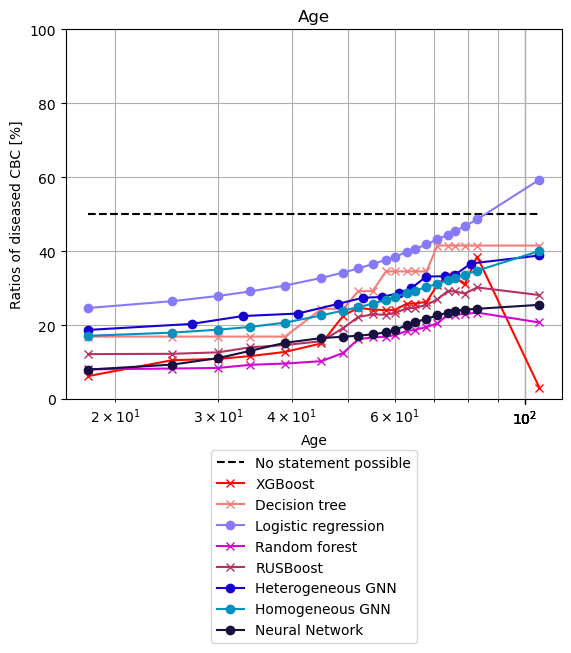

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

SexCategory (0.0)
LR
{'; Feature importance: 0.03'}
DT
{'; Feature importance: 0.0'}
RF
{'; Feature importance: 0.01'}
RUS
{'; Feature importance: 0.01'}
XG
{'; Feature importance: 0.02'}
ANN
{'; Feature importance: 0.01'}
Hom
{'; Feature importance: 0.01'}
Het
{'; Feature importance: 0.01'}


findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

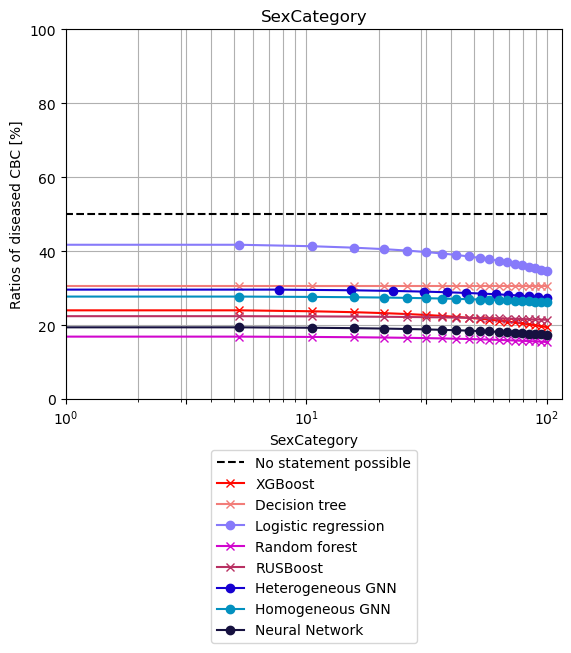

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

HGB (0.04)
LR
{'; Feature importance: 0.25'}
DT
{'; Feature importance: 0.04'}
RF
{'; Feature importance: 0.05'}
RUS
{'; Feature importance: 0.06'}
XG
{'; Feature importance: 0.08'}
ANN
{'; Feature importance: 0.21'}
Hom
{'; Feature importance: 0.24'}
Het
{'; Feature importance: 0.22'}


findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

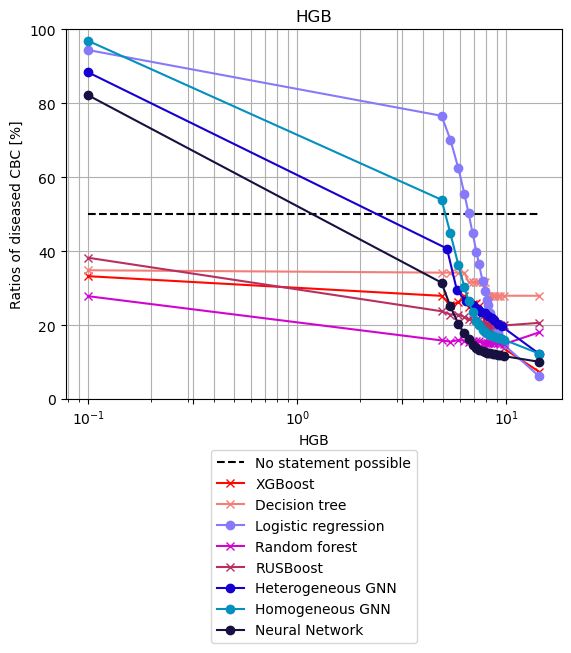

KeyboardInterrupt: 

In [9]:
import numpy as np
from dataAnalysis.Constants import STEPS
from dataAnalysis.Constants import SEX_CATEGORY_COLUMN_NAME
features = decision_tree.columns[1:]
for i, feature in enumerate(features):
#     if SEX_CATEGORY_COLUMN_NAME in feature:
#         continue
    X_large = np.unique(feature_importance_large.X_all_fv[:, i]) if SEX_CATEGORY_COLUMN_NAME not in feature else np.linspace(0, 100, 20)
    X_small = np.unique(feature_importance_small.X_all_fv[:, i]) if SEX_CATEGORY_COLUMN_NAME not in feature else np.linspace(0, 100, 14)
    base = 10
    print(feature)
    print("LR")
    print({get_feature_importance(logistig_regression)})
    print("DT")
    print({get_feature_importance(decision_tree)})
    print("RF")
    print({get_feature_importance(random_forest)})
    print("RUS")
    print({get_feature_importance(rus_boost)})
    print("XG")
    print({get_feature_importance(xg_boost)})
    print("ANN")
    print({get_feature_importance(neural_network)})
    print("Hom")
    print({get_feature_importance(hom_gnn)})
    print("Het")
    print({get_feature_importance(het_gnn)})
    
    plt.semilogx(X_large, np.ones(xg_boost.iloc[:,0].values.shape[0])*50, "k--", label="No statement possible")
    plt.semilogx(X_large, xg_boost.iloc[:, i+1].values, color="#ff0800", marker="x", base=base, label=f"XGBoost")
    plt.semilogx(X_large, decision_tree.iloc[:, i+1].values,color="#f27d79", marker="x", base=base, label=f"Decision tree")
    plt.semilogx(X_large, logistig_regression.iloc[:, i+1].values,color='#877afa', marker="o", base=base, label=f"Logistic regression")
    plt.semilogx(X_large, random_forest.iloc[:, i+1].values, color='#d106ce', marker="x", base=base, label=f"Random forest")
    plt.semilogx(X_large, rus_boost.iloc[:, i+1].values, color='#b83062', marker="x", base=base, label=f"RUSBoost")
    plt.semilogx(X_small, het_gnn.iloc[:, i+1].values, color="#1500d1", marker="o", base=base, label=f"Heterogeneous GNN")
    plt.semilogx(X_large, hom_gnn.iloc[:, i+1].values, color="#0290bf", marker="o", base=base, label=f"Homogeneous GNN")
    plt.semilogx(X_large, neural_network.iloc[:, i+1].values, color="#161140", marker="o", base=base, label=f"Neural Network")
    
    feature_name, feature_importance = decision_tree.columns[1:][i].split(" ")
    
    models = ["No statement possible",
        f"XGBoost{get_feature_importance(xg_boost)}",
             f"Decision tree{get_feature_importance(decision_tree)}",
             f"Logistic regression {get_feature_importance(logistig_regression)}",
             f"Random forest{get_feature_importance(random_forest)}",
              f"RUSBoost{get_feature_importance(rus_boost)}",
             f"Heterogeneous GNN{get_feature_importance(het_gnn)}",
              f"Homogeneous GNN{get_feature_importance(hom_gnn)}",
             f"Neural Network{get_feature_importance(neural_network)}",] ## Featuree importance
#     plt.xlabel("Feature ratio [%]")
    plt.xlabel(xg_boost.columns[1:][i].split(" ")[0])
    plt.ylabel("Ratios of diseased CBC [%]")
    plt.ylim(0, 100)
#     plt.xlim(0, 100)
#     plt.xlim(
#         np.ceil(np.min(X_large)).astype(np.int16), np.floor(np.max(X_large)).astype(np.int16)
#     )
    # Set the desired tick locations and labels
    
    tick_positions = np.logspace(np.ceil(0 if np.min(X_large) == 0 else np.log10(np.min(X_large))).astype(np.int16),
                                 np.floor(np.log10(np.max(X_large))).astype(np.int16)
                                 , 5)  # Example: 11 ticks evenly spaced in log-scale
    tick_labels = [str(int(tick)) for tick in tick_positions]  # Convert the positions to string labels
    plt.xticks(tick_positions)
    plt.title(feature_name)
    plt.grid(True, which="both", ls="-")
    plt.legend(models)
    plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center')
    plt.show()